In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone

In [ ]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt
import torch, numpy as np, cv2

# list the available models in the yolov5 repo
torch.hub.list('ultralytics/yolov5')  

Using cache found in /Users/bementmbp/.cache/torch/hub/ultralytics_yolov5_master


['custom',
 'yolov5l',
 'yolov5l6',
 'yolov5m',
 'yolov5m6',
 'yolov5n',
 'yolov5n6',
 'yolov5s',
 'yolov5s6',
 'yolov5x',
 'yolov5x6']

In [9]:
# load a small and large model
model_n = torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True)  # nano
model_s = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # small
model_l = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)  # x large

Using cache found in /Users/bementmbp/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-3 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/bementmbp/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-3 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Using cache found in /Users/bementmbp/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-3 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
import time
t = '/Users/bementmbp/Desktop/20190727_195030.jpeg'
start = time.time(); nano = model_n(t); end = time.time()
print(f'Made prediction with nano model in {round(end-start, 3)} seconds')
start = time.time(); small = model_s(t); end = time.time()
print(f'Made predictions with small model in {round(end-start, 3)} seconds')
start = time.time(); large = model_l(t); end = time.time()
print(f'Made predictions with large model in {round(end-start, 3)} seconds')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 30))
ax1.imshow(nano.render()[0]); ax1.set_title('Nano model')
ax2.imshow(small.render()[0]); ax2.set_title('Small model')
ax3.imshow(large.render()[0]); ax3.set_title('Large model')
plt.show()

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    cv2.startWindowThread()
    ret, frame = cap.read()
    pred = model_n(frame)
    cv2.imshow('frame', pred.render()[0])
    key = cv2.waitKey(10)    
    if key == ord('q'):
        print('we have pushed the exit key')
        cv2.destroyAllWindows()
        break

print('we have finished the loop')
cap.release()
#cv2.destroyAllWindows()
cv2.waitKey(1)

#### Collect images of happy and sad faces

In [ ]:
import os
import uuid

IMAGE_PATH = os.path.join('data', 'images')
if not os.path.exists(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)
labels = ['happy', 'sad']
num_ims = 5

cap = cv2.VideoCapture(0)
for label in labels:
    print(f'Collecting images for {label}')
    for im_num in range(num_ims):
        print(f'Collecting image {im_num}')
        ret, frame = cap.read()
        cv2.imwrite(os.path.join(IMAGE_PATH, f'{label}_{uuid.uuid1()}.jpg'), frame)
        cv2.waitKey(500)

print('Finished!')
cap.release()
cv2.waitKey(1)

In [ ]:

!pip3 install labelImg

In [7]:
!labelImg

[('Happy', [(121, 261), (284, 261), (284, 456), (121, 456)], None, None, False)]
Image:/Users/bementmbp/Desktop/Scripts/torch_tutorials/data/images/happy_34b48dac-427e-11ed-a7bd-acde48001122.jpg -> Annotation:/Users/bementmbp/Desktop/Scripts/torch_tutorials/data/labels/happy_34b48dac-427e-11ed-a7bd-acde48001122.txt


In [ ]:
!cd yolov5 && python train.py --img 720 --batch 7 --epochs 500 --data dataset.yml --weights yolov5s.pt

In [74]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/bementmbp/Desktop/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/bementmbp/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-5 Python-3.9.13 torch-1.12.1 CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients
Adding AutoShape... 


In [15]:
%matplotlib inline

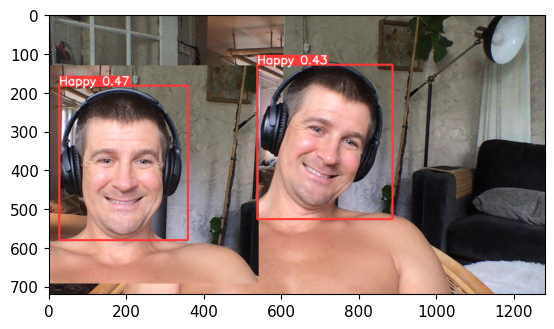

In [67]:
t = '/Users/bementmbp/Desktop/2heads.jpg'
pred = cust_s(t)
plt.imshow(pred.render()[0]); plt.show()

In [71]:
blah = pred.xywh
blah[0].shape
for meh in blah[0]:
    print(meh)

tensor([192.44043, 382.81625, 331.55334, 396.89545,   0.46952,   0.00000])
tensor([7.12348e+02, 3.29216e+02, 3.48708e+02, 3.96844e+02, 4.34758e-01, 0.00000e+00])


In [ ]:
def get_preds(model, img, truth):
    boxes = model(img).xywh[0]
    num_preds = boxes.shape[0]
    for box in boxes:
        x,y,w,h,_,_ = box[0][0]
        x = int(x-w/2)
        y = int(y-h/2)
        x,y,w,h = int(x), int(y), int(w), int(h)
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

    num_truth = len(truth)
    for box in truth:
        _,x,y,w,h = box
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    
    print(f'{num_preds} boxes predicted, {num_truth} boxes expected')
    return img

In [65]:
b = pred.xywh
x,y,w,h,_,_ = b[0][0]
x,y,w,h = int(x), int(y), int(w), int(h)
x = int(x-w/2)
y = int(y-h/2)

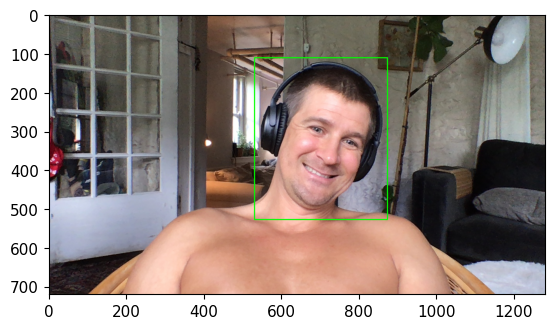

In [66]:
im = plt.imread(t)
ann = cv2.rectangle(im, (x,y), (x+w, y+h), (0,255,0), 2)
plt.imshow(ann)

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    cv2.startWindowThread()
    ret, frame = cap.read()
    pred = cust_s(frame)
    #pred = model_s(frame)
    cv2.imshow('frame', pred.render()[0])
    key = cv2.waitKey(10)    
    if key == ord('q'):
        print('we have pushed the exit key')
        cv2.destroyAllWindows()
        break

print('we have finished the loop')
cap.release()
#cv2.destroyAllWindows()
cv2.waitKey(1)

In [4]:
import cv2

# read .heic image
img = cv2.imread('/Users/bementmbp/Desktop/IMG_4665.HEIC')
type(img)

NoneType